In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os

In [ ]:
# FIXME: this script is not working properly
# # plot instruction-tasks results
# from collections import OrderedDict
# task_map = OrderedDict({"simp": "sari", "emdg": "bleu", "inqqg": "bleu", "exp": "bleu", "hgen": "rouge"})
# tasks = list(task_map.keys())
# def get_score(result, metric):
#     if metric == "sari":
#         return result["sari"]
#     elif metric == "bleu":
#         return result["bleu"]
#     elif metric == "rouge":
#         return result["rouge"]
#     else:
#         raise ValueError(f"Unknown metric: {metric}")
# # plot bar chart
# results = []
# with open("results/instruction-tasks/results.jsonl", "r") as f:
#     for line in f:
#         data = json.loads(line)
#         results.append(data)
# base_scores = []
# tuned_scores = []
# for r in results:
#     if r["model_type"] == "base":
#         pass
#     elif r["model_type"] == "tuned":
#         pass
#     else:
#         raise ValueError(f"Unknown model type: {r['model_type']}")


['base', 'simp', 'emdg', 'inqqg', 'exp', 'hgen']


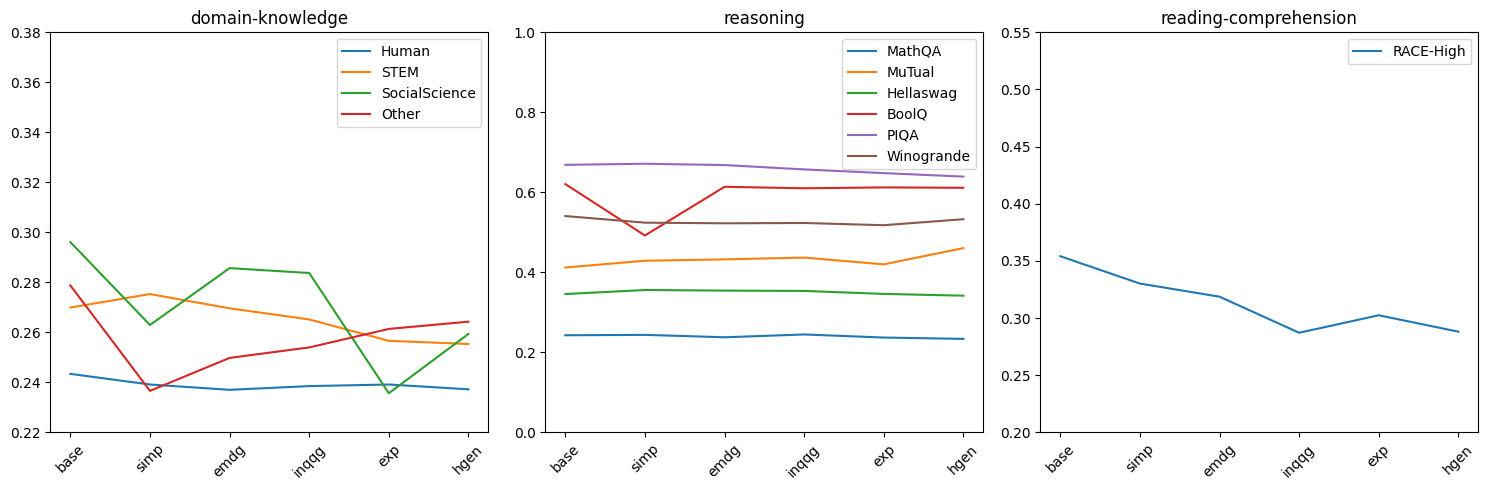

In [8]:
# plot general-tasks results
instruc_tasks = ["simp", "emdg", "inqqg", "exp", "hgen"]
sub_general_tasks = ["domain-knowledge", "reasoning", "reading-comprehension", ]
ylims = {"domain-knowledge": [0.22, 0.38], "reasoning": [0.0, 1.0], "reading-comprehension": [0.2, 0.55]}



def find_result_file(base_path, model_state):
    directory = os.path.join(base_path, model_state)
    for item in os.listdir(directory):
        item_path = os.path.join(directory, item)
        if os.path.isdir(item_path):
            for sub_item in os.listdir(item_path):
                sub_item_path = os.path.join(item_path, sub_item)
                if os.path.isfile(sub_item_path):
                    return sub_item_path
    raise ValueError(f"Cannot find result file in {directory}")

def get_score(data, domain):
    score = {}
    if domain == "domain-knowledge":
        score["Human"] = data["groups"]["mmlu_humanities"]["acc,none"]
        score["STEM"] = data["groups"]["mmlu_stem"]["acc,none"]
        score["SocialScience"] = data["groups"]["mmlu_social_sciences"]["acc,none"]
        score["Other"] = data["groups"]["mmlu_other"]["acc,none"]
    elif domain == "reasoning":
        score["MathQA"] = data["results"]["mathqa"]["acc,none"]
        score["MuTual"] = data["results"]["mutual"]["r@2,none"]
        score["Hellaswag"] = data["results"]["hellaswag"]["acc,none"]
        score["BoolQ"] = data["results"]["boolq"]["acc,none"]
        score["PIQA"] = data["results"]["piqa"]["acc,none"]
        score["Winogrande"] = data["results"]["winogrande"]["acc,none"]
    elif domain == "reading-comprehension":
        score["RACE-High"] = data["results"]["race"]["acc,none"]
    else:
        raise ValueError(f"Unknown domain: {domain}")
    return score

def list_dict_to_dict_list(list_dict):
    dict_list = {}
    for d in list_dict:
        for k, v in d.items():
            if k not in dict_list:
                dict_list[k] = []
            dict_list[k].append(v)
    return dict_list



model_states = ["base"] + instruc_tasks

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, sub_task in enumerate(sub_general_tasks):
    base_path = f"results/general-tasks/{sub_task}"
    scores = []
    for model_state in model_states:
        result_file = find_result_file(base_path, model_state)
        with open(result_file, "r") as f:
            data = json.load(f)
        score = get_score(data, sub_task)
        scores.append(score)
    scores = list_dict_to_dict_list(scores)
    for k, v in scores.items():
        axs[i].plot(v, label=k)
    axs[i].set_title(sub_task)
    axs[i].legend()
    axs[i].set_xticks(range(len(model_states)))
    axs[i].set_xticklabels(model_states, rotation=45) 
    axs[i].set_ylim(ylims[sub_task])
plt.tight_layout()
plt.show()
    

    

        


